## TASK 2

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

In [2]:
##  если в коллабе

# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
data = sqlite3.connect("checking-logs.sqlite")

In [4]:
c  = pd.io.sql.read_sql("SELECT * FROM checker",
                                    data,
                                    parse_dates= True
                                     )
c

,index,status,success,timestamp,numTrials,labname,uid
0,0,checking,0,2020-04-16 21:12:50.740474,5,None,admin_1
1,1,ready,0,2020-04-16 21:12:54.708365,5,code_rvw,admin_1
2,2,checking,0,2020-04-16 21:46:47.769088,7,None,admin_1
3,3,ready,0,2020-04-16 21:46:48.121217,7,lab02,admin_1
4,4,checking,0,2020-04-16 21:53:01.862637,6,code_rvw,admin_1
...,...,...,...,...,...,...,...
3397,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3398,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3399,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3400,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [5]:
commits = pd.io.sql.read_sql('''
SELECT timestamp
FROM checker 
WHERE uid LIKE 'user_%' and status='ready'
    ''',
data)
commits

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:45.549397
2,2020-04-17 05:34:24.422370
3,2020-04-17 05:43:27.773992
4,2020-04-17 05:46:32.275104
...,...
1681,2020-05-21 20:01:48.959966
1682,2020-05-21 20:18:54.487900
1683,2020-05-21 20:19:06.872761
1684,2020-05-21 20:22:41.877806


In [6]:
dt = pd.io.sql.read_sql('''
SELECT datetime
FROM pageviews 
WHERE uid LIKE "user%" AND DATE(datetime) IN(SELECT DATE(timestamp)
FROM checker 
WHERE uid LIKE 'user_%' and status='ready'
);
''',
data)

In [7]:
commits_df = pd.DataFrame(data=commits)
commits_df['timestamp'] = pd.to_datetime(commits_df['timestamp'])
commits_df.rename(columns={'timestamp':'commits'}, inplace=True)


In [8]:
df = pd.DataFrame(data=dt)
df['datetime'] = pd.to_datetime(df['datetime'])
df.rename(columns={'datetime':'views'}, inplace=True)


In [9]:
grouped = df.groupby([df["views"].dt.date])["views"].count()

In [10]:
com_gr = commits_df.groupby([commits_df['commits'].dt.date])['commits'].count()

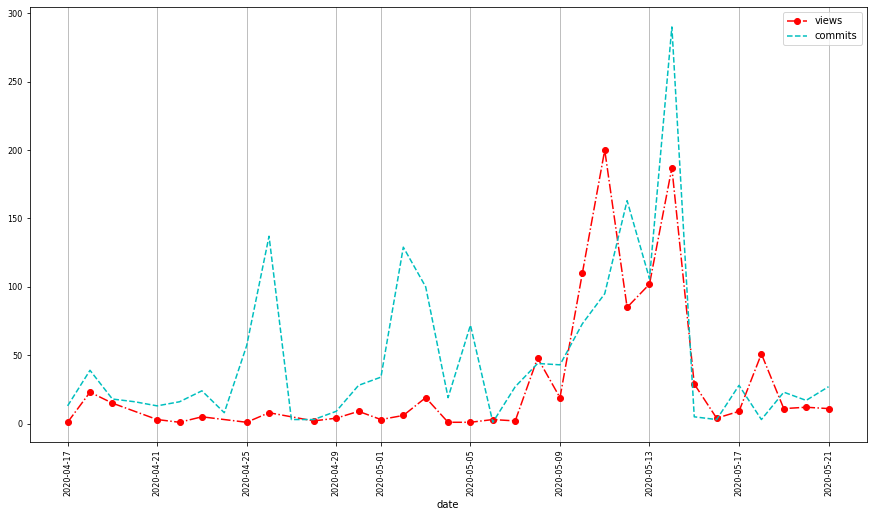

In [11]:
grouped.plot.line(xlabel='date',
                marker='o',
                legend = ['views'],
                color=['r'],
                linestyle='-.',
                fontsize=8, 
                figsize= (15, 8),
                rot=90)
com_gr.plot.line(xlabel='date',
                 legend = ['commits'],
                 linestyle='--',
                 color=['#00bfbf'],
                rot=90)
plt.grid(axis='x')

Сколько раз количество просмотров превышало 150?

Ответ:2

In [12]:
grouped.sort_values(ascending=False).head(5)

views
2020-05-11    200
2020-05-14    187
2020-05-10    110
2020-05-13    102
2020-05-12     85
Name: views, dtype: int64

In [13]:
data.close()